# Site 734 Mid v. Early
This notebook calculates and plots the enrichment of codons at site 734 in the early gDNA samples compared to the plasmid.

**Sample Info**

In [1]:
# selection_sample info
stage = "mid"
sort_status = "notSorted"

# reference_sample info
ref_stage = 'early'
ref_sort_status = "notSorted"

## Notebook setup
Imports

In [2]:
import pandas as pd
import plotnine as p9

# print imports and versions
# copied from https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
print('\n'.join(f'{m.__name__}=={m.__version__}' \
                for m in globals().values() if getattr(m, '__version__', None)))

%run ../../functions/enrichment.py.ipynb import calculate_enrichment

pandas==0.25.3
plotnine==0.6.0


Input data

In [3]:
site_734_counts = '../../results/site_734/site_734_counts.csv'
permitted_codons_file = '../../results/site_734/permitted_codons.csv'
stat2_luciferase_file = '../../data/STAT2_luciferase_results.csv'

Output data

In [4]:
site_734_dir = '../../results/site_734/'

Notebook aesthetics

In [5]:
p9.theme_set(p9.theme_classic())
CBPALETTE_RICH = ['#648FFF', '#FFB000', '#DC267F', '#785EF0', '#FE6100']

## Load data
Load site 734 frequencies

In [6]:
codon_counts = pd.read_csv(site_734_counts)
display(codon_counts)

,codon,count,library,name,site,sorted,source,stage,wildtype,mutant_codon,letter
0,AAC,0.000000,wt,wt-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,N
1,AAC,33.000000,wt,wt-gDNA-noStage-notSorted,734,notSorted,gDNA,noStage,GAT,True,N
2,AAC,129.000000,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,N
3,AAC,54.000000,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,N
4,AAC,83.000000,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,N
...,...,...,...,...,...,...,...,...,...,...,...
457,TAC,74.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,Y
458,TGA,85.333333,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,O
459,TGC,67.666667,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,C
460,TGG,83.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,W


In [7]:
codon_counts['name'].unique()

array(['wt-plasmid-noStage-notSorted', 'wt-gDNA-noStage-notSorted',
       'lib1-plasmid-noStage-notSorted', 'lib2-plasmid-noStage-notSorted',
       'lib3-plasmid-noStage-notSorted', 'lib1-gDNA-early-notSorted',
       'lib2-gDNA-early-notSorted', 'lib3-gDNA-early-notSorted',
       'lib1-gDNA-mid-notSorted', 'lib2-gDNA-mid-notSorted',
       'lib3-gDNA-mid-notSorted', 'lib1-gDNA-late-notSorted',
       'lib2-gDNA-late-notSorted', 'lib3-gDNA-late-notSorted',
       'lib1-gDNA-late-sorted', 'lib2-gDNA-late-sorted',
       'lib3-gDNA-late-sorted', 'mean-gDNA-early-notSorted',
       'mean-gDNA-late-notSorted', 'mean-gDNA-late-sorted',
       'mean-gDNA-mid-notSorted', 'mean-plasmid-noStage-notSorted'],
      dtype=object)

## Plot enrichment for each library:

In [8]:
libs = ['lib1', 'lib2', 'lib3']

Calculating enrichment between:
lib1-gDNA-mid-notSorted and lib1-gDNA-early-notSorted


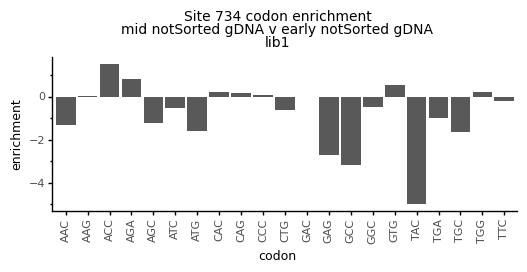

<ggplot: (8725970692373)>

Calculating enrichment between:
lib2-gDNA-mid-notSorted and lib2-gDNA-early-notSorted


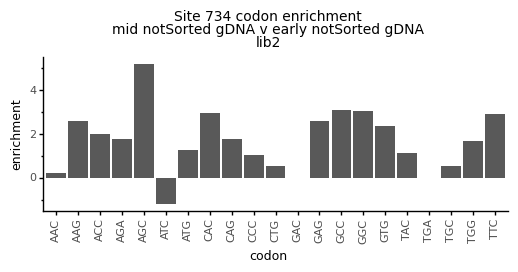

<ggplot: (8726828860645)>

Calculating enrichment between:
lib3-gDNA-mid-notSorted and lib3-gDNA-early-notSorted


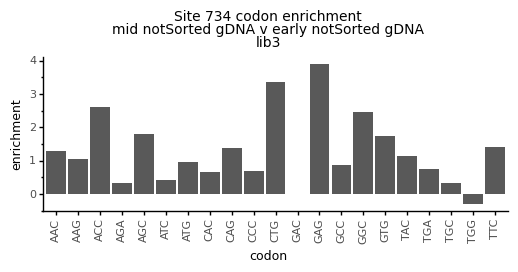

<ggplot: (8725970668141)>

In [9]:
for lib in libs:
    selected_sample = f'{lib}-gDNA-{stage}-{sort_status}'
    reference_sample = f'{lib}-gDNA-{ref_stage}-{ref_sort_status}'
    print('Calculating enrichment between:')
    print(f'{selected_sample} and {reference_sample}')
    enrichment_df = calculate_enrichment(
        codon_counts,
        734,
        "D",
        selected_sample,
        reference_sample)
    enrichment_plot = (p9.ggplot(enrichment_df) +
                    p9.aes(x='codon',
                           y='enrichment') +
                    p9.geom_bar(stat='identity') +
                    p9.ggtitle('Site 734 codon enrichment\n'
                               f'{stage} {sort_status} gDNA v {ref_stage} {ref_sort_status} gDNA\n'
                               f'{lib}') +
                    p9.labs(x='codon',
                            y='enrichment') +
                    p9.theme(figure_size=(6, 2),
                             plot_title=p9.element_text(size=10),
                             axis_title=p9.element_text(size=9),
                             axis_text_x=p9.element_text(size=8, rotation=90),
                             axis_text_y=p9.element_text(size=8))
                   )

    display(enrichment_plot)

## Comparison to STAT2 antagonism luciferase assay
Each of these amino acids has previously been tested for ability to antagonize STAT2 in a luciferase assay. How do the sequencing-based enrichment scores correlate with the luciferase assay results?

In [10]:
stat2_results = pd.read_csv(stat2_luciferase_file)
display(stat2_results.sort_values(by='FLUC_RLUC'))

,amino_acid,FLUC_RLUC
20,D,1.6
19,E,6.4
18,S,48.9
17,C,54.3
16,N,77.9
15,T,88.8
14,W,90.7
13,Q,95.2
12,H,96.8
11,A,105.8


Calculate enrichment for mean counts:

In [11]:
lib = "mean"

selected_sample = f'{lib}-gDNA-{stage}-{sort_status}'
reference_sample = f'{lib}-gDNA-{ref_stage}-{ref_sort_status}'
print('Calculating enrichment between:')
print(f'{selected_sample} and {reference_sample}')
enrichment_df = calculate_enrichment(
    codon_counts,
    734,
    "D",
    selected_sample,
    reference_sample)
display(enrichment_df)

Calculating enrichment between:
mean-gDNA-mid-notSorted and mean-gDNA-early-notSorted


,codon,wildtype_selected,letter,count_selected,count_pseudo_selected,wildtype_reference,count_reference,count_pseudo_reference,enrichment
0,AAC,GAT,N,56.000000,56.100000,GAT,81.333333,81.433333,-0.124466
1,AAG,GAT,K,132.666667,132.766667,GAT,76.666667,76.766667,1.203493
2,ACC,GAT,T,143.333333,143.433333,GAT,51.000000,51.100000,1.902137
3,AGA,GAT,R,89.666667,89.766667,GAT,53.333333,53.433333,1.161592
4,AGC,GAT,S,89.000000,89.100000,GAT,68.666667,68.766667,0.786868
5,ATC,GAT,I,37.333333,37.433333,GAT,65.000000,65.100000,-0.385182
6,ATG,GAT,M,106.333333,106.433333,GAT,136.000000,136.100000,0.058435
7,CAC,GAT,H,109.333333,109.433333,GAT,61.333333,61.433333,1.246111
8,CAG,GAT,Q,197.000000,197.100000,GAT,135.666667,135.766667,0.950951
9,CCC,GAT,P,81.666667,81.766667,GAT,79.666667,79.766667,0.448879


Plot correlation to luciferase assay:

,enrichment,amino_acid,FLUC_RLUC
11,0.000000,D,1.6
12,1.379936,E,6.4
4,0.786868,S,48.9
18,-0.313447,C,54.3
0,-0.124466,N,77.9
2,1.902137,T,88.8
19,0.792882,W,90.7
8,0.950951,Q,95.2
7,1.246111,H,96.8
13,-0.298709,A,105.8


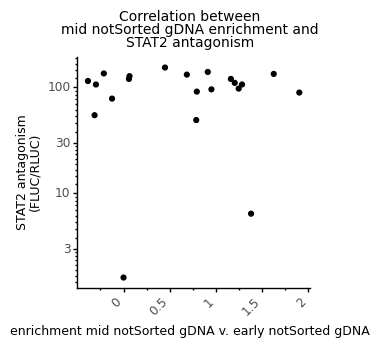

<ggplot: (8725970711541)>

In [12]:
enrichment_stat2_corr = (pd.merge(
    left=enrichment_df[['letter','enrichment']],
    right=stat2_results,
    left_on='letter',
    right_on='amino_acid',
    how='outer')
    .drop(columns='letter'))
display(enrichment_stat2_corr.sort_values(by='FLUC_RLUC'))

enrichment_stat2_corr_plot = (
    p9.ggplot(enrichment_stat2_corr) +
    p9.aes(x='enrichment',
           y='FLUC_RLUC') +
    p9.geom_point() +
    p9.ggtitle(f'Correlation between\n{stage} {sort_status} gDNA enrichment and\nSTAT2 antagonism') +
    p9.labs(x=f'enrichment {stage} {sort_status} gDNA v. {ref_stage} {ref_sort_status} gDNA',
            y='STAT2 antagonism\n(FLUC/RLUC)') +
    p9.scale_y_log10() +
    p9.theme(figure_size=(3,3),
             plot_title=p9.element_text(size=10),
             axis_title=p9.element_text(size=9),
             axis_text_x=p9.element_text(rotation=45, hjust=1),
             legend_position='right',
             legend_title=p9.element_text(size=10),
             legend_title_align='center'))

display(enrichment_stat2_corr_plot)